In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

In [4]:
processed_df = pd.read_csv('data/processed_inputs.csv')
processed_df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadAngina,HadStroke,...,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack
0,1,0,0,1,11,1.63,84.820000,32.099998,1,0,...,1,4,0,0,0,1,0,0,1,0
1,2,0,0,4,9,1.60,71.669998,27.990000,0,0,...,0,4,0,0,1,1,1,0,0,0
2,3,0,1,0,8,1.78,71.209999,22.530001,0,0,...,0,4,1,0,0,0,2,0,0,0
3,4,0,1,4,10,1.78,95.250000,30.129999,0,0,...,0,4,0,0,1,1,2,0,0,0
4,8,1,0,1,8,1.70,87.540001,30.230000,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
X = processed_df.drop('HadHeartAttack', axis=1)
y = processed_df['HadHeartAttack']

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Baseline Logistic Regression with all Features

lr = LogisticRegression(max_iter=1000, random_state=123)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=123)

In [14]:
# Get predictions and probabilities
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Calculate AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f'AUROC Score: {auroc:.3f}')

AUROC Score: 0.882


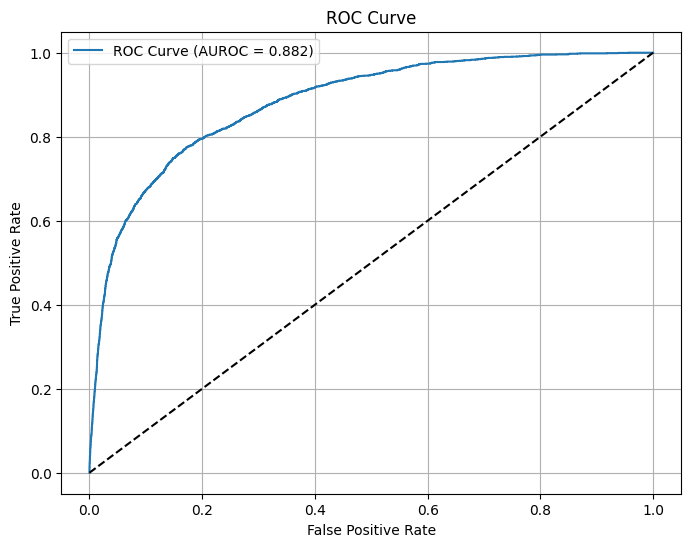

In [17]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUROC = {auroc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
joblib.dump(lr, 'models/baseline_logistic_model.pkl')

['models/baseline_logistic_model.pkl']